In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
df= pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


EDA
&
DATA CLEANING

In [105]:
df.shape
df.columns
df.info
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [106]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [107]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='HeartDisease'>

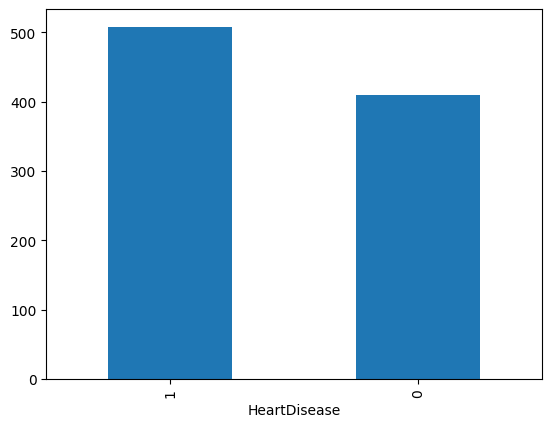

In [108]:
df['HeartDisease'].value_counts().plot(kind='bar')

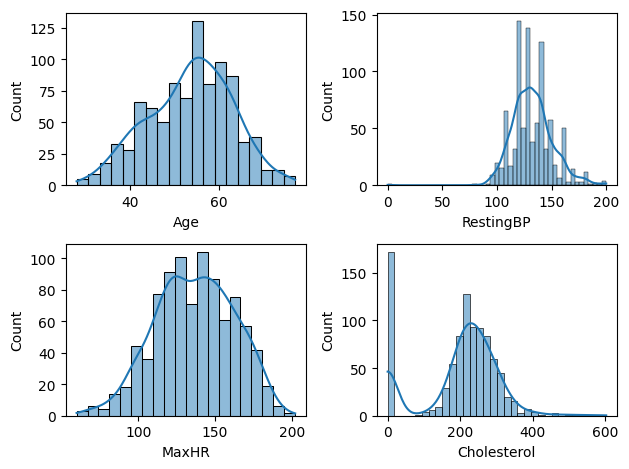

In [109]:
def plotting(var,num):
    plt.subplot(2,2,num)#divide cavas in 2by 2 grid  num to select plot
    sns.histplot(df[var],kde=True)
plotting('Age',1)
plotting('RestingBP',2)
plotting('MaxHR',3)
plotting('Cholesterol',4)
plt.tight_layout()


In [110]:
#its is not possible that resting bp is not zero it show in graph
#same in choratorl
#now clean the data
ch_mean=df.loc[df['Cholesterol']!=0,'Cholesterol'].mean()
ch_mean

np.float64(244.6353887399464)

In [111]:
df['Cholesterol']=df['Cholesterol'].replace(0,ch_mean)
df['Cholesterol']=df['Cholesterol'].round(2)
df['Cholesterol']

0      289.0
1      180.0
2      283.0
3      214.0
4      195.0
       ...  
913    264.0
914    193.0
915    131.0
916    236.0
917    175.0
Name: Cholesterol, Length: 918, dtype: float64

In [112]:
RS_mean=df.loc[df['RestingBP']!=0,'RestingBP'].mean()

df['RestingBP']=df['RestingBP'].replace(0,RS_mean)
df['RestingBP']=df['RestingBP'].round(2)
df['RestingBP']

0      140.0
1      160.0
2      130.0
3      138.0
4      150.0
       ...  
913    110.0
914    144.0
915    130.0
916    130.0
917    138.0
Name: RestingBP, Length: 918, dtype: float64

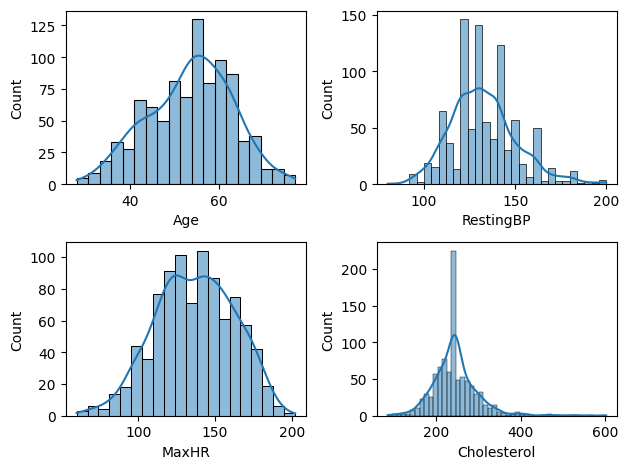

In [113]:
plotting('Age',1)
plotting('RestingBP',2)
plotting('MaxHR',3)
plotting('Cholesterol',4)
plt.tight_layout()

In [114]:
#this the libaray by sherian school 
!pip install sheryanalysis==0.1.0


Defaulting to user installation because normal site-packages is not writeable


In [115]:
#this the libaray by sherian school 
import sheryanalysis as sh
sh.analyze(df)



🔍 Basic Analysis Report
------------------------------------------------------------
📏 Shape: (918, 12)
🧱 Columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

✅ No null values found

🔠 Categorical Columns: ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

🔢 Numerical Columns: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sheryanalysis\utils.py:103: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(sample)
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sheryanalysis\utils.py:103: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(sample)
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sheryanalysis\utils.py:103: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(sample)
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sheryanalysis\utils.py:103: UserWarni

{'shape': (918, 12),
 'columns': ['Age',
  'Sex',
  'ChestPainType',
  'RestingBP',
  'Cholesterol',
  'FastingBS',
  'RestingECG',
  'MaxHR',
  'ExerciseAngina',
  'Oldpeak',
  'ST_Slope',
  'HeartDisease'],
 'dtypes': {'Age': dtype('int64'),
  'Sex': dtype('O'),
  'ChestPainType': dtype('O'),
  'RestingBP': dtype('float64'),
  'Cholesterol': dtype('float64'),
  'FastingBS': dtype('int64'),
  'RestingECG': dtype('O'),
  'MaxHR': dtype('int64'),
  'ExerciseAngina': dtype('O'),
  'Oldpeak': dtype('float64'),
  'ST_Slope': dtype('O'),
  'HeartDisease': dtype('int64')},
 'null_counts': {'Age': 0,
  'Sex': 0,
  'ChestPainType': 0,
  'RestingBP': 0,
  'Cholesterol': 0,
  'FastingBS': 0,
  'RestingECG': 0,
  'MaxHR': 0,
  'ExerciseAngina': 0,
  'Oldpeak': 0,
  'ST_Slope': 0,
  'HeartDisease': 0},
 'total_rows': 918,
 'column_types': {'categorical': ['Sex',
   'ChestPainType',
   'FastingBS',
   'RestingECG',
   'ExerciseAngina',
   'ST_Slope',
   'HeartDisease'],
  'numerical': ['Age', 'Rest

<Axes: xlabel='Sex', ylabel='count'>

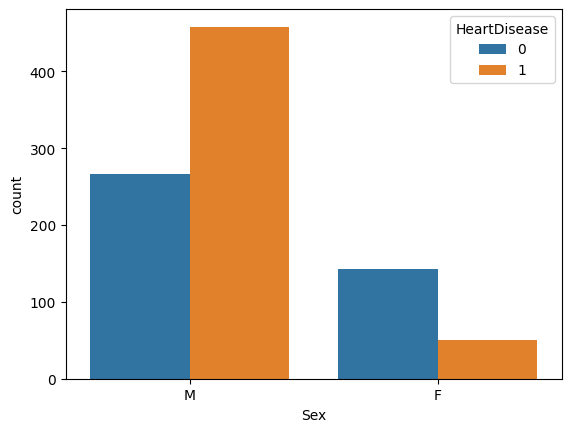

In [116]:
#for categorical variable
sns.countplot(x=df['Sex'],hue=df['HeartDisease'])#it male dominant

<Axes: xlabel='ChestPainType', ylabel='count'>

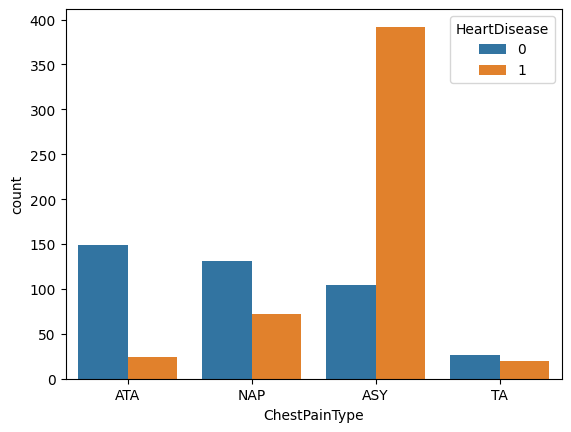

In [117]:
sns.countplot(x=df['ChestPainType'],hue=df['HeartDisease'])

<Axes: xlabel='FastingBS', ylabel='count'>

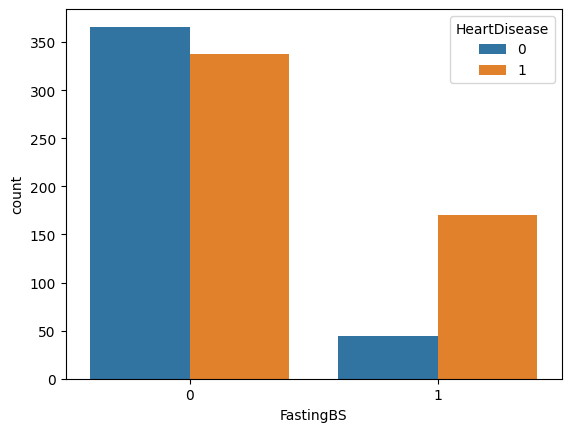

In [118]:
sns.countplot(x=df['FastingBS'],hue=df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

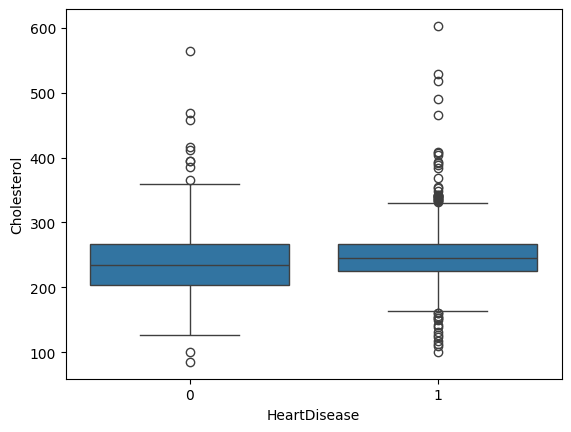

In [119]:
#numeric and category
sns.boxplot(x=df['HeartDisease'],y=df['Cholesterol'])

<Axes: xlabel='HeartDisease', ylabel='Age'>

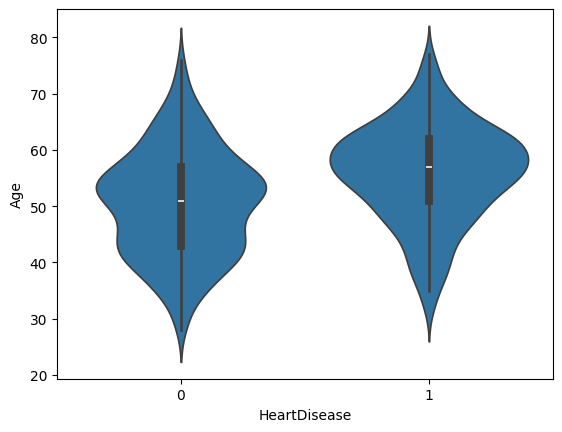

In [120]:
sns.violinplot(x=df['HeartDisease'],y=df['Age'])

<Axes: >

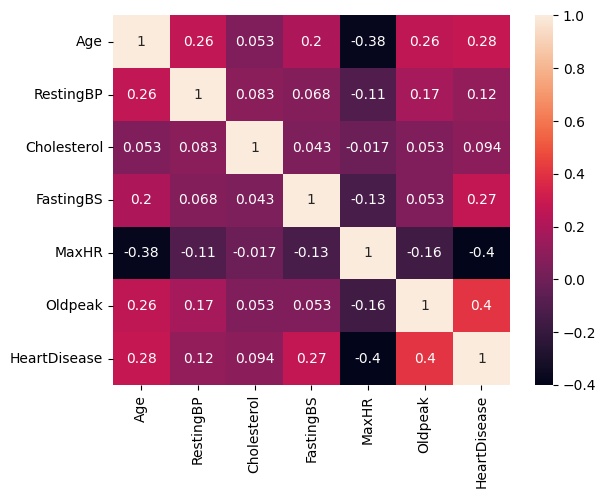

In [121]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

DATA PREPROCESSING AND CLEANING


In [122]:
df=pd.get_dummies(df,drop_first=True)
df=df.astype(int)

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

logisticregression


In [124]:
x=df.drop('HeartDisease',axis=1)
y=df['HeartDisease']
x

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0,0,1,0,0,0,0,0,1,0


In [125]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.20, random_state=42)

In [126]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [127]:
df=df.astype(int)

In [128]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1


In [129]:
lr=LogisticRegression()
lr.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [130]:
y_pred_lr=lr.predict(X_test_scaled)
y_pred_lr

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1])

In [131]:
y_test


668    0
30     1
377    1
535    1
807    0
      ..
211    1
745    1
584    1
878    0
451    1
Name: HeartDisease, Length: 184, dtype: int64

In [132]:
accuracy_score(y_test,y_pred_lr)#0.8641304347826086

0.8695652173913043

In [133]:
f1_score(y_test,y_pred_lr)#0.8792270531400966

0.8846153846153846

In [134]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        77
           1       0.91      0.86      0.88       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



KNN

In [135]:
KN=KNeighborsClassifier()
KN.fit(X_train_scaled,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [136]:
y_pred_kn=KN.predict(X_test_scaled)

In [137]:
accuracy_score(y_test,y_pred_kn)#0.8586956521739131

0.8641304347826086

In [138]:
f1_score(y_test,y_pred_kn)#0.8785046728971962

0.8815165876777251

In [139]:
print(classification_report(y_test,y_pred_kn))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



NAVIE BAYES


In [140]:
NB=GaussianNB()
NB.fit(X_train_scaled,y_train)

,priors,None
,var_smoothing,1e-09


In [141]:
y_pred_nb=NB.predict(X_test_scaled)

In [142]:
accuracy_score(y_test,y_pred_kn)#0.8586956521739131

0.8641304347826086

In [143]:
f1_score(y_test,y_pred_kn)#0.8785046728971962

0.8815165876777251

DECISION TREE

In [144]:
DT=DecisionTreeClassifier(random_state=42)
DT.fit(X_train_scaled,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [145]:
y_pred_dt=DT.predict(X_test_scaled)

In [146]:
accuracy_score(y_test,y_pred_dt)#0.8206521739130435

0.7989130434782609

In [147]:
f1_score(y_test,y_pred_dt)#0.8374384236453202

0.8159203980099502

SVM

In [148]:
SV=SVC()
SV.fit(X_train_scaled,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [149]:
y_pred_svm=SV.predict(X_test_scaled)

In [150]:
accuracy_score(y_test,y_pred_svm)#0.8369565217391305

0.8478260869565217

In [151]:
f1_score(y_test,y_pred_svm)#0.8584905660377359

0.8666666666666667

SO  THE BEST MODEL IS LOGISTIC REGRESSION

NOW SAVE THE MODEL

In [154]:
import joblib 
joblib.dump(lr,'lr.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(x.columns.tolist(),'columns.pkl')




['columns.pkl']

In [153]:
x.columns.tolist()

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'Sex_M',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_Y',
 'ST_Slope_Flat',
 'ST_Slope_Up']